### Importing Libraries

In [27]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

### Importing Data

In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
#Dimensions of the dataframe
df.shape

(1025, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<AxesSubplot: >

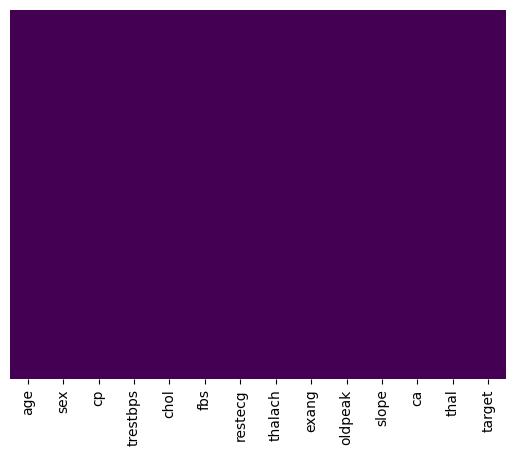

In [13]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
#The dataset has no missing values

### Describe data

In [49]:
col_info = ["age", "1: male, 0: female", "chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic", 
            "resting blood pressure", "serum cholestoral in mg/dl", "fasting blood sugar > 120 mg/dl", 
            "resting electrocardiographic results (values 0,1,2)", "maximum heart rate achieved", "exercise induced angina", 
            "oldpeak = ST depression induced by exercise relative to rest", "the slope of the peak exercise ST segment", 
            "number of major vessels (0-3) colored by flourosopy", "thal: 0 = normal; 1 = fixed defect; 2 = reversable defect"]

for i in range(len(col_info)):
    print(df.columns[i]+":\t\t\t" + col_info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.groupby('target').size()

target
0    499
1    526
dtype: int64

In [7]:
df.groupby('target').sum()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,28228,413,241,66919,125395,82,228,69426,274,798.5,582,578,1267
1,27567,300,725,67983,126755,71,315,83416,71,299.8,838,195,1115


### Data Visualization

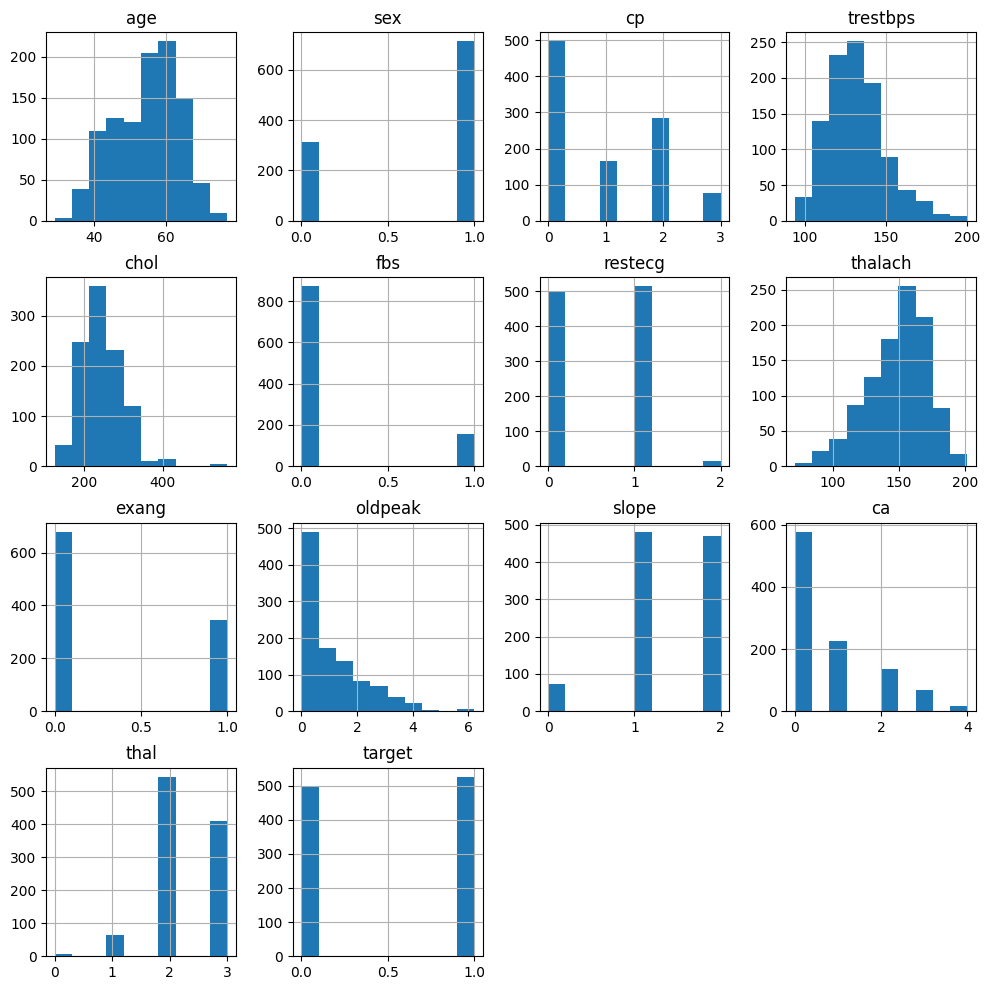

In [11]:
# create a histogram for each column
df.hist(figsize=(12,12))
plt.show()

<AxesSubplot: xlabel='sex', ylabel='age'>

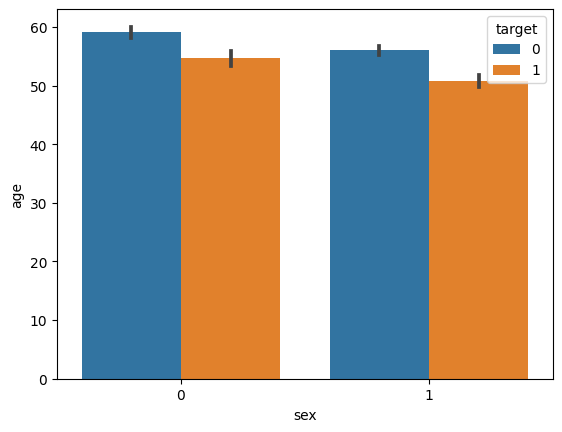

In [12]:
sns.barplot(x = df['sex'], y = df['age'], hue = df['target'])

<AxesSubplot: xlabel='cp', ylabel='target'>

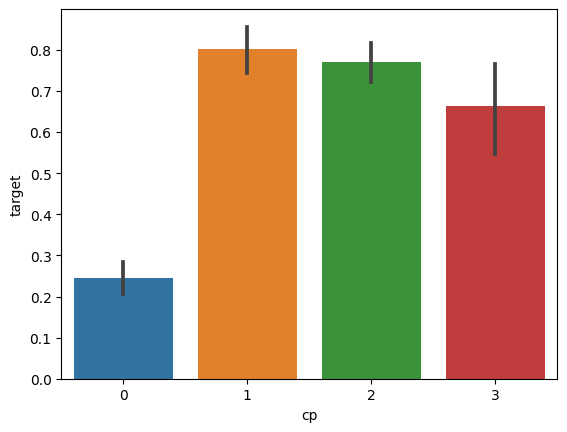

In [18]:
sns.barplot(x='cp', y='target', data=df)

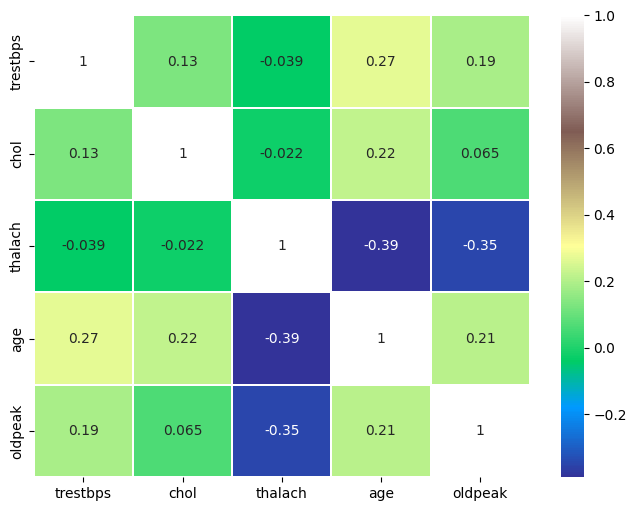

In [19]:
# create a correlation heatmap
numeric_columns=['trestbps','chol','thalach','age','oldpeak']
sns.heatmap(df[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_3592\1696703888.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\dell\AppData\Local\Temp\ipykernel_3592\1696703888.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




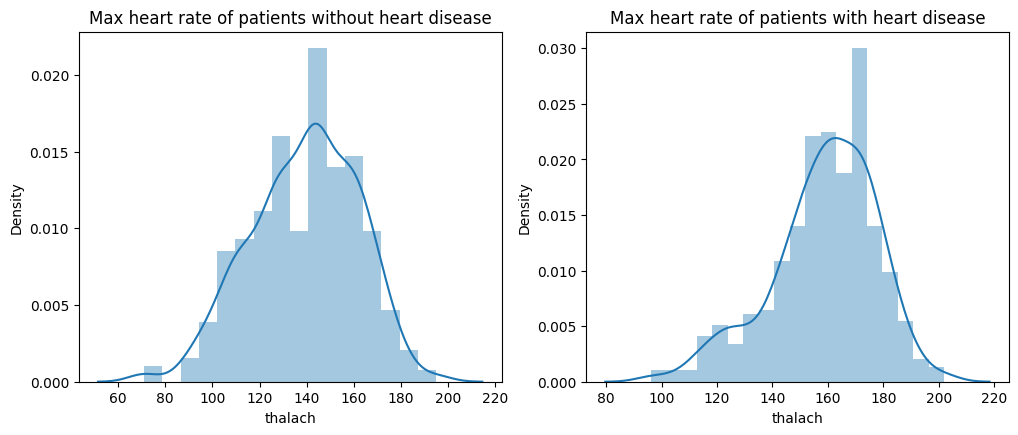

In [21]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target'] == 0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['target'] == 1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

### Data Pre-processing 

In [24]:
# Spitting data
x, y = df, df.target

x.drop('target', axis = 1, inplace = True)

In [25]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [26]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [28]:
# Scaling the x values
x = StandardScaler().fit_transform(x)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size = 0.3, shuffle=True)

print ("train_set_x shape: " + str(x_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(x_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (717, 13)
train_set_y shape: (717,)
test_set_x shape: (308, 13)
test_set_y shape: (308,)


### Training the model

#### Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [47]:
# Evaluate Model
prediction = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, prediction)*100

print("Accuracy on training set: {:.3f}".format(dt.score(x_train, y_train)))
print("Accuracy on test set: " + str(accuracy_dt))

Accuracy on training set: 1.000
Accuracy on test set: 97.40259740259741


In [48]:
import pickle
filename = 'HeartDisease_model.sav'
pickle.dump(dt, open(filename, 'wb'))

#### KNN Model

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
k_range=range(1,26)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    prediction_knn = knn.predict(x_test)
    scores[k] = accuracy_score(y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 1 with score : 0.9512987012987013


In [38]:
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:
prediction_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test,prediction_knn) * 100

print('Mean Squared Error score : ', mean_squared_error(y_test,prediction_knn)*100,'%') 
print("Accuracy on training set: {:.3f}".format(knn.score(x_train, y_train)))
print('Accuracy Score : ', accuracy_score(y_test,prediction_knn)*100,'%')

Mean Squared Error score :  4.870129870129871 %
Accuracy on training set: 1.000
Accuracy Score :  95.12987012987013 %
